###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2020 Adam Wickenheiser

# Doing Work

A classic example of a thermodynamic process doing useful work is an internal combustion engine, which is used to drive everything from a lawnmower to a cruise ship!

In [1]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/CaVXe3Gxomo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

We will discuss the particulars of this cycle in a later lesson, but the common feature of this and other power cycles is the transfer of heat into useful work.  In this case, the fuel-air mixture combusts, which quickly transfers chemical energy into heating the mixture.  As we will see in this lesson, this heat causes a rise in pressure, which can be used to move the piston.  The piston is connected to a drivetrain that ultimately produces locomotion.

In this lesson, we will focus on how heat can be transfered into useful work output.

## Learning objectives:

1. To be able to calculate the work done in compressing a spring or piston
1. To be able to write a balance of energy to determine how much energy is required to cause a desired temperature and volume change
1. To be able to determine if a process is polytropic and calculate the work done
1. To be able to write an energy balance when multiple forms of work are being done

## Contents:

1. [Calculating Mechanical Work Done](#mechwork)
1. [Compression and Expansion of Ideal Gases](#idealgas)
1. [Curve Fitting Polytropic Processes](#poly)

<a id='mechwork'></a>

### Calculating Mechanical Work Done

When we write down an energy balance (the First Law of Thermodynamics), we write

$Q - W = \Delta E_{sys}$

and we interpret this to mean the net heat transferred to a system ($Q$) minus the work done by the system ($W$) must be the change in energy of the system ($\Delta E_{sys}$).

Let's first look at the work term $W$.  In many systems, a gas or liquid is pressurized in order to push against a moving boundary, like a piston, to produce work.  However, there is usually a force that resists this motion: it may be gravity, an elastic membrane, a spring, or a mechanical linkage.

We will start with something simple and familiar, a linear spring.  It's force-displacement curve is a straight line given by $F(x) = -kx$, where $F$ is the force the spring exerts, $x$ is its displacement from its relaxed length, and $k$ is the spring constant, which is just the proportional relationship between $F$ and $x$.  The negative sign indicates that the spring "resists" being deformed; it exerts a force in the opposite direction of its deflection.

**Example:** The piston inside a tire pressure gauge is pushed from $x_1 = 0.02 m$ to $x_2 = 0.15m$, where we assume $x=0$ is the position at which the spring is relaxed.  The spring constant is measured to be $k = 10 N/m$.  Calculate how much work is done on the piston by the compressed air on its left.

<img src="../images/tire pressure gauge ex.png" width="500" />

If we draw a free body diagram of the piston, we get

<img src="../images/tire pressure gauge fbd.png" width="400" />

As with all thermodynamic processes, we assume that the piston is moving slowly enough to be in a quasiequilibrium state at all times.  (It turns out that in this case this assumption isn't necessary if the piston starts and stops with zero velocity.)  A balance of forces in the $x$-direction gives

$F = -F_{spring} = -(-kx) = kx$

In general, we calculate the work done in process from state 1 to state 2 as

$W_{12} = \int\limits_1^2 \delta W$

where we are integrating $\delta W$ along a particular path from $1$ to $2$.  This can be quite difficult to calculate mathematically in general, but in many practical situations, the path is easy to analyze.  In this case, the path is a straight line from $x_1$ to $x_2$.

The increment of work is in general given by $\delta W = \mathbf{F}(\mathbf{x}) \cdot d\mathbf{x}$ where $\mathbf{F}$ is the force whose work you want to determine, and $\mathbf{x}$ is the position at which the force is acting.  In this case, the force and displacement are both in the $+x$-direction, and so we get

$W_{12} = \int\limits_{x_1}^{x_2} F(x)dx = \int\limits_{x_1}^{x_2} kxdx = \dfrac{1}{2}k(x_2^2-x_1^2) = 0.11 J$

Computing the work done during a process almost always involves evaluating an integral, except in the simplest cases.  In this example, we can evaulate the integral using a formula to get an exact answer, so it provides an opportunity to test a numerical method for doing the same.  The following figure shows the integral we need to compute $\int\limits_{x_1}^{x_2} kxdx$, and a numerical approximation of it:

<img src="../images/spring force integration.png" width="300" />

First, we need to load the library for numerical integration and quadrature, along with our usual favorites.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct
import scipy.integrate as integrate

In [3]:
k = 10.0                  # spring constant [N/m]

def spring_force_fun(x):
    
    return k*x            # return F(x)

In [4]:
x1 = 0.02         # initial position [m]
x2 = 0.15         # final position [m]
W = integrate.quad(spring_force_fun,x1,x2)[0]

print('Work done to compress spring',W,'J')

Work done to compress spring 0.1105 J


So we can see that the numerical quadrature method has a relative error of about 0.5%.

Most mechanical systems do not behave as linear springs over their full range of motion.  For example, most metals tend to soften as the applied stress approaches their yield strength, as the following plot shows.

<img src="../images/stress-strain diagram.png" width="400" />

This behavior is known as "strain softening", meaning that after a certain point it becomes easier to deform.  One way to model this softening behavior is to add a cubic term to the spring force:

$F(x) = -kx - \alpha x^3$

Let's plot this function for several values of $\alpha$.

In [5]:
k = 10.0                  # spring constant [N/m]

def cubic_spring_force_fun(x,alpha):
    
    return k*x - alpha*x**3            # return F(x)

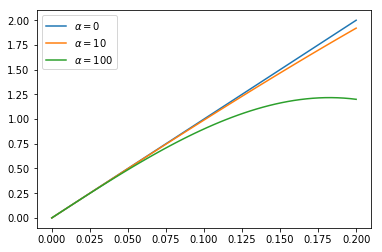

In [6]:
alpha_array = np.array([0,10,100])
x_array = np.linspace(0,0.2)
for alpha in alpha_array:
    plt.plot(x_array,cubic_spring_force_fun(x_array,alpha),label=r'$\alpha = %d$' % alpha)
plt.legend();

#### Try it!

Repeat the previous example but with $\alpha = 100$.  Compare the exact answer to the one you get using numerical quadrature.  What is the percentage reduction in work done on the softening spring compared to the linear one?

The exact solution can be computed using the following equation:

$W_{12} = \int\limits_{x_1}^{x_2} F(x)dx = \int\limits_{x_1}^{x_2} (kx-\alpha x^3)dx = \dfrac{1}{2}k(x_2^2-x_1^2) - \dfrac{1}{4}\alpha(x_2^4-x_1^4) = 0.098 J$

The following code computes the work done for both springs and calculates the relative difference:

In [7]:
x1 = 0.02         # initial position [m]
x2 = 0.15         # final position [m]

# linear spring
W_linear = integrate.quad(spring_force_fun,x1,x2)[0]
print('Work done to compress linear spring',W_linear,'J')

# cubic spring
alpha = 100
W_cubic = integrate.quad(cubic_spring_force_fun,x1,x2,args=alpha)[0]
print('Work done to compress cubic spring',W_cubic,'J')

# relative difference
print('Relative difference',(W_cubic-W_linear)/W_linear*100.0,'%')

Work done to compress linear spring 0.1105 J
Work done to compress cubic spring 0.09784774999999998 J
Relative difference -11.450000000000015 %


Often, tabulated data is given for force vs. displacement instead of a formula.  Let's take a look at an example where data is given in an Excel spreadsheet.  Pressure vs. displacement data is given for the compression and expansion strokes of a 4-stroke engine.  Assume the area of the piston is $A = 0.00456 m^2$.

In [8]:
import pandas as pd

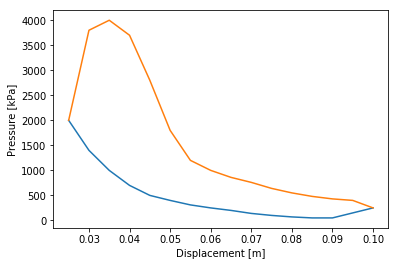

In [9]:
data = pd.read_excel('../data/Pressure-displacement curves.xlsx')
x = np.array(data.iloc[:,0])
P1 = np.array(data.iloc[:,1])
P2 = np.array(data.iloc[:,2])
plt.plot(x,P1,x,P2)
plt.ylabel('Pressure [kPa]')
plt.xlabel('Displacement [m]');

Now, let's calculate the total work done.  Since this process is a cycle (it starts and ends at the same point), the total work done turns out to be the area inside the closed curve, as follows:

$ W_{cycle} = \oint \delta W = \int\limits_\text{upper path} \delta W - \int\limits_\text{lower path} \delta W = \int\limits_{x_1}^{x_2} P_\text{expansion}(x)Adx - \int\limits_{x_1}^{x_2} P_\text{compression}(x)Adx$

The following code uses Simpson's rule to approximate the integral.  Note that previously we used quadrature when we had a function to evaluate.  In this case, we just have a set of data points rather than a function.

In [10]:
W_cycle = -integrate.simps(P2-P1,x)     # minus sign in front since data runs from greatest x to least
print('Total work done during this cycle =',W_cycle,'kW')

Total work done during this cycle = 86.60416666666666 kW


<a id='idealgas'></a>

### Compression and Expansion of Ideal Gases

In this section, let's look at how we might design an internal combustion engine to produce a certain amount of work per cycle.  In Thermodynamics, as in other engineering subjects, we first start with a simple model of the process we'd like to design, then refine it further, adding more details as needed, until we are confident enough to build a prototype.

A typical internal combustion engine has the following four phases of its cyclical motion, called "strokes":

<img src="../images/four stroke engine.png" width="600" />

The last two strokes, exhaust and intake, both occur at roughly atmospheric pressure and so bascially cancel out.  Therefore, we can ignore them when determining the work output of the engine.

The compression and expansion strokes form a closed-loop, beginning and ending at the same point.  An "engineering model" of this cycle appears below.  Compare this plot to the pressure vs. displacement plot of the previous example.

<img src="../images/Otto cycle.png" width="400" />

This model of internal combustion is called the [Otto Cycle](https://en.wikipedia.org/wiki/Otto_cycle).  It is composed of the following processes:

* $1 \to 2$ The fuel-air mixture is compressed with very little heat transfer to the environment.  This is usually modeled with the following relationship: $Pv^n = const.$  This is called an **polytropic process**.  The exponent $n$ can be fit to experimental data, which will be done in this lesson, or its exact value can derived using the ideal gas law and other approximations.
* $2 \to 3$ The fuel-air mixture rapidly combusts, transferring heat into the mixture and increasing the pressure.  This happens so fast that the piston does not move; thus, the volume is constant during this process.
* $3 \to 4$ The high pressure causes the piston to move down and the gas to expand.  Again, this process is curve fit using $Pv^n = const.$
* $4 \to 1$ The exhaust gas leaves and is replaced by a new fuel-air mixture.  This is idealized as a drop in pressure while the piston is stationary.

Now, let's calculate the total work done.  Since this process is a cycle (it starts and ends at the same point), the total work done turns out to be the area inside the closed curve, as follows:

$ W_{cycle} = \oint \delta W = \int\limits_1^2 \delta W + \int\limits_2^3 \delta W + \int\limits_3^4 \delta W + \int\limits_4^1 \delta W$

Let's look at a typical term in this equation and see if we can write it using familiar variables.

$\int\limits_1^2 \delta W = \int\limits_{x_1}^{x_2} F(x)dx = \int\limits_{x_1}^{x_2} P(x)Adx$

The term $Adx$ represents the change in volume of the cylinder as the piston moves.  So we can re-write this as $Adx = dV = mdv$, where $V$ is the volume and $v$ is the specific volume.  Now, we can write

$\int\limits_1^2 \delta W = m\int\limits_{v_1}^{v_2} P(v)dv$

where we assume the mass of gas in the cylinder $m$ remains constant during the process, and pressure can be written as a function of specific volume.

Using this equation, we can revisit the equation for work over the cycle:

$ W_{cycle} = m\int\limits_{v_1}^{v_2} P(v)dv + m\int\limits_{v_2}^{v_3} P(v)dv + m\int\limits_{v_3}^{v_4} P(v)dv + m\int\limits_{v_4}^{v_1} P(v)dv = m\int\limits_{v_1}^{v_2} P(v)dv + m\int\limits_{v_3}^{v_4} P(v)dv$

where we used the fact that

$ m\int\limits_{v_2}^{v_3} P(v)dv = m\int\limits_{v_4}^{v_1} P(v)dv = 0$

For a polytropic process, we have a formula for $P(v)$, so we can evaluate these integrals exactly using $P(v) = Cv^{-n}$:

$\int\limits_{v_1}^{v_2} P(v)dv = \int\limits_{v_1}^{v_2} Cv^{-n}dv = C\dfrac{v_2^{1-n}-v_1^{1-n}}{1-n} = \dfrac{P_2v_2-P_1v_1}{1-n}$

where we used the fact that $C = P_1v_1^n = P_2v_2^n$

In the special case $n=1$, this equation becomes

$\int\limits_{v_1}^{v_2} P(v)dv = P_1v_1\ln\left(\dfrac{v_2}{v_1} \right) = P_2v_2\ln\left(\dfrac{v_2}{v_1} \right)$

**Example:** We would like to design an Otto cycle that produces $900 J$ of energy per cycle.  We are constrained by the following design requirements: 
1. $r \equiv \dfrac{v_1}{v_2} \leq 12$.  If this **compression ratio** is any larger, the fuel will autoignite, causing undue vibration in the engine ("knocking") leading potentially to damage
1. $P_1 = 1 atm$ and $T_1 = 18 ^\circ C$.  The intake and exhaust occur at (roughly) atmospheric pressure and temperature.  We will consider ways to circumvent this requirement in a later lesson.
1. $T_3 = 1300 ^\circ C$.  This is the maximum temperature the engine can operate at without suffering fatigue damage.
1. We will assume the gas in the engine is air.  This is a common assumption called the **air standard model**.
1. The two polytropic processes are governed by $Pv^{1.5} = const.$

What displacement $V_1-V_2$ is necessary to produce the desired work?

We'd like to make the engine as small as possible (smallest cylinder diameter) and yet still achieve the desired work output.  As we previously mentioned, the net work output of the cycle is the area inside the curve on the $P-v$ diagram, so we want to make this area as large as possible.  We do this by making $\dfrac{v_1}{v_2}$ as large as possible, which increases the width of the area, and by making $\dfrac{T_3}{T_1}$ as large as possible, which increases the height of the area.

Let's summarize what we know about the four states of the cycle:

**State 1:**  ***Known:*** $P_1,T_1$, ***Unknown:*** $v_1$

**State 2:**  ***Known:*** $v_2$ (once we find $v_1$, we can assume $\dfrac{v_1}{v_2} = 12$ to maximize the compression ratio), $P_2$ (once we find $v_2$, we can use the polytropic process equation $P_1v_1^{1.5} = P_2v_2^{1.5}$), ***Unknown:*** $T_2$

**State 3:**  ***Known:*** $v_3$ ($v_3 = v_2$ by assumption), $T_3 = 1300 ^\circ C$ (we want $T_3$ as large as possible), ***Unknown:*** $P_3$

**State 4:**  ***Known:*** $v_4$ ($v_4 = v_1$ by assumption), $P_4$ (once we find $P_3$, we can use the polytropic process equation $P_3v_3^{1.5} = P_4v_4^{1.5}$), ***Unknown:*** $T_4$

Let's create a function that takes the parameters of the Otto cycle and outputs a plot of the cycle on a $P-v$ diagram and the work output on a per mass basis (that way it can be easily scaled later).

In [11]:
def Otto_cycle_Pv(T1,P1,T3,r,n):
    # T1 = temperature at state 1 [K]
    # P1 = pressure at state 1 [Pa]
    # T3 = temperature at state 3 [K]
    # r = compression ratio
    # n = polytropic process exponent
    
    # state 1
    state1 = ct.Solution('air.xml', 'air')      # create air object
    state1.TP = T1, P1                          # set temperature and pressure
    v1 = state1.v                               # specific volume [m^3/kg]
    
    # state 2
    state2 = ct.Solution('air.xml', 'air')      # create air object
    v2 = v1/r                                   # specific volume, using compression ratio [m^3/kg]
    P2 = P1*(v1/v2)**n                          # pressure, using polytropic process equation [Pa]
    state2.DP = 1/v2, P2                        # set density and pressure
    
    # state 3
    state3 = ct.Solution('air.xml', 'air')      # create air object
    v3 = v2                                     # specific volume [m^3/kg]
    state3.TD = T3, 1/v3                        # set temperature and density
    P3 = state3.P                               # pressure [Pa]
    
    # state 4
    state4 = ct.Solution('air.xml', 'air')      # create air object
    v4 = v1                                     # specific volume [m^3/kg]
    P4 = P3*(v3/v4)**n                          # pressure, using polytropic process equation [Pa]
    state4.DP = 1/v4, P4                        # set density and pressure
    
    # draw cycle on P-v diagram
    v_array = np.linspace(v1,v2,101)
    plt.plot(v_array,(P1*v1**n)*v_array**(-n),'b',linewidth=2)
    plt.plot([v2,v3],[P2,P3],'bo-',linewidth=2)
    plt.plot(v_array,(P3*v3**n)*v_array**(-n),'b',linewidth=2)
    plt.plot([v4,v1],[P4,P1],'bo-',linewidth=2)
    plt.text(v1,P1,'  1',fontsize=12)
    plt.text(v2,P2,'2  ',fontsize=12,fontdict=dict(ha='right'))
    plt.text(v3,P3,'3  ',fontsize=12,fontdict=dict(ha='right'))
    plt.text(v4,P4,'  4',fontsize=12)
    plt.ylabel('Pressure [Pa]')
    plt.xlabel('Specific volume [m^3/kg]')
    
    # compute work/mass using polytropic process integral formulas
    if n == 1:
        w = P3*v3*np.log(v4/v3) + P1*v1*np.log(v2/v1)
    else:
        w = (P2*v2-P1*v1)/(1-n) + (P4*v4-P3*v3)/(1-n)
    return w

Work per unit mass = 230521.02912311547 J/kg


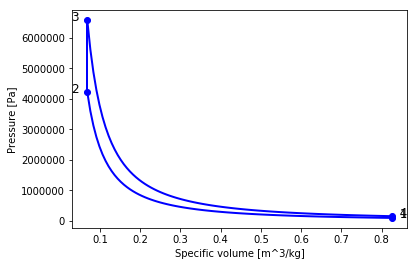

In [12]:
T1 = 18.0 + 273.15            # temperature [K]
P1 = 1.0*101325.0             # pressure [Pa]
T3 = 1300.0 + 273.15          # temperature [K]
r = 12.0                      # compression ratio
n = 1.5                       # polytropic process exponent

# plot Otto cycle and compute work/mass
w = Otto_cycle_Pv(T1,P1,T3,r,n)
print('Work per unit mass =',w,'J/kg')

Now we know the specific work output, we can compute how much mass of air is required to hit our target of $W = 900 J$.

In [13]:
W = 900             # work output [J]
m = W/w             # mass of air [kg]
print('Mass of air required =',m,'kg')

Mass of air required = 0.003904199124147293 kg


Now, the displacement can be calculated using this mass, as

$V_1 - V_2 = m(v_1 - v_2) = m \left( v_1 - \dfrac{v_1}{r} \right)$

In [14]:
state1 = ct.Solution('air.xml', 'air')      # create air object
state1.TP = T1, P1                          # set temperature and pressure
v1 = state1.v                               # specific volume [m^3/kg]
disp = m*(v1-v1/r)                          # displacement [m^3]
print('Displacement =',disp*1000.0,'L')     # convert to liters

Displacement = 2.9514341998168034 L


<a id='simcond'></a>

### Simulating Heat Conduction... with Work

In the previous section, we calculated the work output of a moving piston while the gas moving it was going through a thermodynamic cycle.  In physics this is often called **moving boundary work**.

In the previous lesson, we simulated the conduction of heat through the boundary of a cooler full of cold air.  To review, heat conduction is the mechanism by which heat is transfered between two systems at rest relative to each other, where one system is at a higher temperature than the other.

Let's consider a piston-cylinder setup filled with a refrigerated air placed in a room.  As you would expect, the temperature of the air in the vessel will gradually increase until it matches the room's air temperature.  The air temperature of the room will decrease ever so slightly, but we can assume this effect is negligible.  As heat is transfered to the system, the piston will slowly rise as the air heats up.  The main difference between this example and the one in the previous lesson is that the air in this example is at a constant pressure; whereas in the previous example it was at a constant volume.

<img src="../images/piston cylinder const pressure.png" width="600" />

We can see quickly that the pressure inside the cylinder must be equal to the pressure outside at all times by considering a free body diagram of the piston:

<img src="../images/piston fbd.png" width="150" />

Assuming the acceleration of the piston is negligible, we get

$0 = \sum F = P_{sys}A - P_{atm}A$

where, $A$ is the area of each piston face.  This equation shows that we must have $P_{sys} = P_{atm}$.

When we model how energy flows into or out of a control system, we start with an energy balance (the First Law of Thermodynamics):

$Q - W = \Delta E_{sys}$

where, as usual, we define $Q > 0$ to be heat transferred *to* the system and $W > 0$ to be work done *by* the system (on the surroundings -- in this case, on the piston).

For heat conduction, we make the usual assumption that he rate at which heat transfered can be well approximated by [Fourier's law](https://en.wikipedia.org/wiki/Thermal_conduction#Fourier's_law):

$\dfrac{dQ}{dt} = k(T_{room}-T_{sys})$

where \\(k\\) is the thermal conductivity.

The rate at which the temperature of the air in the cylinder increases is approximated by

$\dfrac{\partial U_{sys}}{\partial T_{sys}} = m c_v$

where \\(m\\) is the mass of the air, and \\(c_v\\) is its specific heat at constant volume.

If we assume air is an ideal gas, then mathematically it can be shown that $c_v(T,P) \approx c_v(T)$, just like incompressible liquids and solids.  Thus, we can convert the partial derivative to an ordinary derivative:

$\dfrac{dU_{sys}}{dT_{sys}} = m c_v$

Since the air and its container are at rest, we can assume $U_{sys} = E_{sys}$.

Putting these equations together gives

$k(T_{room}-T_{sys}) - \dfrac{dW}{dt} = \dfrac{dQ}{dt} - \dfrac{\partial W}{\partial t} = \dfrac{dE_{sys}}{dt} = \dfrac{dU_{sys}}{dt} = \dfrac{dU_{sys}}{dT_{sys}} \dfrac{dT_{sys}}{dt} = m c_v \dfrac{dT_{sys}}{dt}$

Rearranging, we have

$k(T_{room}-T_{sys}) = m c_v \dfrac{dT_{sys}}{dt} + \dfrac{dW}{dt}$

Now, let's focus on the $\dfrac{dW}{dt}$ term.  The incremental work for a moving boundary is given by

$\delta W = mP(v)dv$

as previously derived.  We can take the time derivative of this increment and get

$\dfrac{dW}{dt} = mP \dfrac{dv}{dt}$

where we have noted that $m$ and $P$ are constant in this example.

Since we want to write everything in terms of $T_{sys}$, we can use the ideal gas law to relate $v$ to $T_{sys}$, as follows:

$Pv = RT_{sys}$

and so

$P \dfrac{dv}{dt} = R \dfrac{dT_{sys}}{dt}$

Whew!  Now we are finally in a position to write everything in  terms of the unknown function $T_{sys}(t)$, which we can solve since we know the intial value, $T_{sys}(0) = 278 K$:

$k(T_{room}-T_{sys}) = m c_v \dfrac{dT_{sys}}{dt} + mR \dfrac{dT_{sys}}{dt}$

Rearranging this equation into standard form gives

$\dfrac{dT_{sys}}{dt} = \dfrac{k}{m (c_v+R)}(T_{room}-T_{sys})$

Let's compare this equation to the constant-volume example we did in the previous lesson:

$\dfrac{dT_{sys}}{dt} = \dfrac{k}{m c_v}(T_{room}-T_{sys})$

It has basically the same form as our current constant-pressure example.  In fact, if we define a new variable $c_p = c_v+R$, then we get

$\dfrac{dT_{sys}}{dt} = \dfrac{k}{m c_p}(T_{room}-T_{sys})$

which has the exact same form.  $c_p$ is called the **specific heat at constant pressure**.  The equation $c_p = c_v+R$ is only true for ideal gases; however, for any substance, $c_p > c_v$.  We will explain why this is at the conclusion of this example.

Let's assume the values $m = 0.003 kg$ and $k = 0.01 \frac{W}{K}$ and that $T_{room} = 295 K$ is constant.

We will use [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), which is like MATLAB's ode45, to solve this initial value problem.  We will compare this solution to the one from the previous lesson.

In [15]:
state = ct.Solution('air.xml', 'air')      # create air object
m = 0.003             # mass of air in cooler [kg]
k = 0.01              # thermal conductivity [W/K]
P = 101325.0          # air pressure [Pa]
T_room = 295          # room temperature [K]

def dT_sys_const_v(t, T_sys):
    state.TP = T_sys, P                   # set the temperature and pressure
    return k/(m*state.cv)*(T_room-T_sys)

def dT_sys_const_P(t, T_sys):
    state.TP = T_sys, P                   # set the temperature and pressure
    return k/(m*state.cp)*(T_room-T_sys)

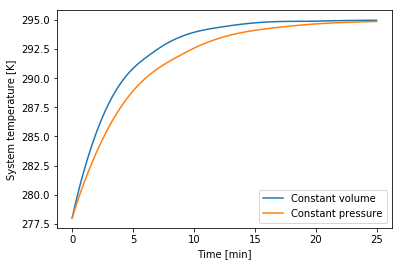

In [16]:
tspan = [0, 1500]     # time span of integration [s]
ICs = [278]           # initial conditions [T_sys [K]]
tarray = np.linspace(0,1500,101)
solution_v = integrate.solve_ivp(dT_sys_const_v,tspan,ICs,t_eval=tarray)
solution_P = integrate.solve_ivp(dT_sys_const_P,tspan,ICs,t_eval=tarray)

plt.plot(np.squeeze(solution_v.t)/60,np.squeeze(solution_v.y),label='Constant volume')
plt.plot(np.squeeze(solution_P.t)/60,np.squeeze(solution_P.y),label='Constant pressure')
plt.ylabel('System temperature [K]')
plt.xlabel('Time [min]')
plt.legend();

Temperature rises more slowly in the constant pressure case; however, the system temperatures ultimately reach the same final temperature as this is the point of thermal equilibrium with the surroundings.  In the constant pressure case, some of the heat transfered is converted into work to push the piston outward.  This energy is not retained by the gas to be used to increase its temperature.

This explains why $c_p$ is always greater than $c_v$: it takes more heat to raise the temperature of a substance under constant pressure because some of the heat is used to do work, rather than all of the heat being used to raise its temperature.

<a id='poly'></a>

### Curve Fitting Polytropic Processes

Several processes we've seen so far are considered polytropic processes because they have the form $Pv^n = const.$  Here are two examples:

* $n = 0$ corresponds to a constant pressure process (also known as **isobaric**), sincw we have $Pv^0 = P = const.$

* $n = \infty$ corresponds to a constant volume process (also known as **isochoric**), since we have $Pv^n \to v^n = const.$ as $n \to \infty$

If we are working with an ideal gas, we also have:

* $n = 1$ corresponds to a constant temperature process (also known as **isothermal**), since we have $Pv = RT = const.$ using the ideal gas law

Real liquids and gases do not behave exactly like ideal gases; however, the general trend of $P$ increasing as $v$ decreases usually holds.  And in many cases this relationship can be fit to a curve of the form $Pv^n = const.$

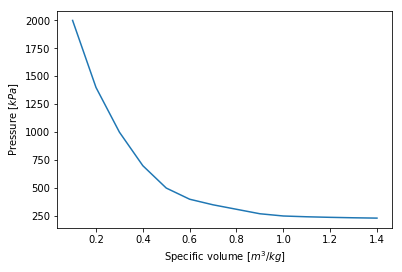

In [17]:
data = pd.read_excel('../data/Polytropic process.xlsx')
v = np.array(data.iloc[:,0])
P = np.array(data.iloc[:,1])
plt.plot(v,P)
plt.ylabel('Pressure [$kPa$]')
plt.xlabel('Specific volume [$m^3/kg$]');

To fit these data to a polytropic process, we will use [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit), which can attempt to fit any function you can write an equation for.  The fit function we give it has to be of the form $y = f(x,p_1,p_2,...)$, where $p_1,p_2,...$ are unknown parameters (constants) of the function.  The algorith tries to find the values of these parameters that best fit the data.

Let's write the polytropic process like $Pv^n = C$, where the unknown parameters of the function are $n$ and $C$.  Let's call these unknown parameters $p_1$ and $p_2$.  Then we have $Pv^{p_1} = p_2$.

In our plot of the data, pressure is the dependent variable and specific volume is the independent variable.  We need to rewrite the function so that the dependent variable appears by itself on the left-hand side:

$P = \dfrac{p_2}{v^{p_1}}$

In [18]:
import scipy.optimize as optim

Polytropic process exponent = 0.8350816162936416
Standard error = [ 0.04381207 25.20431522]


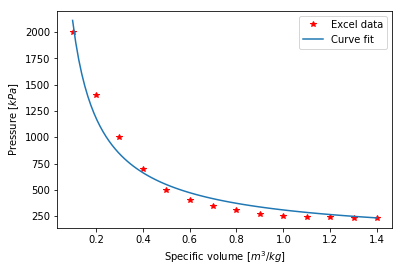

In [19]:
# replot the data as red stars
plt.plot(v,P,'r*')
plt.ylabel('Pressure [$kPa$]')
plt.xlabel('Specific volume [$m^3/kg$]')

# define a function to fit
def func(x, n, C):
    return C/x**n

# perform nonlinear curve fit
popt,pcov = optim.curve_fit(func,v,P)
v_array_dense = np.linspace(0.1,1.4,101)            # make a denser v array for plotting the curve fit
plt.plot(v_array_dense,func(v_array_dense,*popt))
plt.legend(['Excel data','Curve fit'])
print('Polytropic process exponent =',popt[0])
print('Standard error =',np.sqrt(np.diag(pcov)))

Using these curve fit parameters, we can evaluate the work integrals exactly using $P(v) = Cv^{-n}$:

$\int\limits_{v_1}^{v_2} P(v)dv = \int\limits_{v_1}^{v_2} Cv^{-n}dv = C\dfrac{v_2^{1-n}-v_1^{1-n}}{1-n}$

In the special case $n=1$, this equation becomes

$\int\limits_{v_1}^{v_2} P(v)dv = C\ln\left(\dfrac{v_2}{v_1} \right)$